In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yaml
import seaborn

from sqlalchemy import create_engine
# read database connection
conn = ''
    
try:
    env = yaml.safe_load(open('../../env'))
    x = env.split(" ")
    for i in x:
        j = i.split("=")
        if j[0] == 'DATABASE_CONNECTION':
            conn =  j[1]
except:
    print("Error opening env file:", sys.exc_info()[0])

engine = create_engine(conn)

sql = "SELECT * from cell_metadata"
df_cell_metadata = pd.read_sql_query(sql, con=engine)

sql = "SELECT * from test_metadata"
df_test_metadata = pd.read_sql_query(sql, con=engine)

sql = "select * from cycle_data"
df_cycle_data = pd.read_sql_query(sql, con=engine)

sql = "select * from timeseries_data"
df_timeseries_data = pd.read_sql_query(sql, con=engine)

In [2]:
df_cell_metadata.columns

Index(['cathode', 'anode', 'source', 'ah', 'form_factor', 'cell_id'], dtype='object')

In [3]:
df_test_metadata.columns

Index(['temp', 'soc_max', 'soc_min', 'v_max', 'v_min', 'crate_c', 'crate_d',
       'cell_id'],
      dtype='object')

In [4]:
df_cycle_data.columns

Index(['v_max', 'v_min', 'ah_c', 'ah_d', 'e_c', 'e_d', 'i_max', 'i_min',
       'v_c_mean', 'v_d_mean', 'e_eff', 'ah_eff', 'cycle_index', 'test_time',
       'cell_id'],
      dtype='object')

In [5]:
df_timeseries_data.columns

Index(['i', 'v', 'ah_c', 'ah_d', 'e_c', 'e_d', 'temp_1', 'temp_2',
       'cycle_time', 'date_time', 'cycle_index', 'test_time', 'cell_id'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

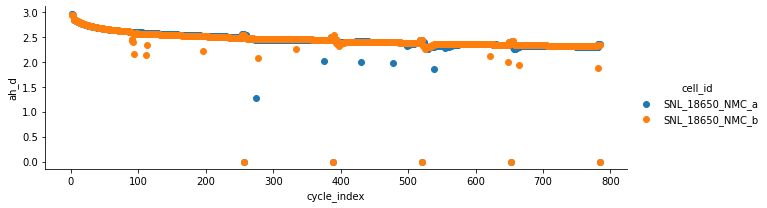

In [6]:
plt.figure()
_cells = df_cell_metadata.cell_id.unique()

fg = seaborn.FacetGrid(data=df_cycle_data, hue='cell_id', hue_order=_cells, aspect=3)
fg.map(plt.scatter, 'cycle_index', 'ah_d').add_legend()

<Figure size 432x288 with 0 Axes>

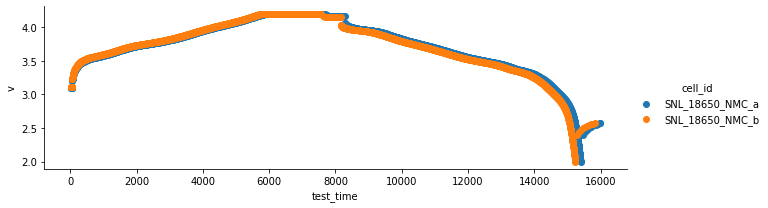

In [7]:
plt.figure()
_cells = df_cell_metadata.cell_id.unique()

df_timeseries_data_1=df_timeseries_data[df_timeseries_data['cycle_index']==1]


fg = seaborn.FacetGrid(data=df_timeseries_data_1, hue='cell_id', hue_order=_cells, aspect=3)
fg.map(plt.scatter, 'test_time', 'v').add_legend()